In [1]:
from __future__ import print_function
from __future__ import division

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ROOT import TFile, TTree, TLorentzVector, TVector3, TRandom3

import numpy as np

get_ipython().run_line_magic('matplotlib', 'notebook')

In [2]:
# Load tree from file
inName = "4l_fullSM.root"
inFile = TFile(inName, "READ")
t      = inFile.Get("tree")


# Initialize RNG
rng = TRandom3()
rng.SetSeed()
nEntries = t.GetEntries()


# Create charge and flavor dictionaries
markerDict = {-1:'_',  +1:'+', 0:''}
colorDict  = {11:'#a2142f',  13:'#0072bd', 0:'#7e2f8e'}   # red = electron; blue = muon
angleDict  = {11:'#e9506d',  13:'#3eb3ff'}
lineDict   = {'p':'-', 'k':'--'} # solid = high-M; dashed = low-M
flavorDict = {11:r"$\vec{p}_{\mathrm{e}^+}$", -11:r"$\vec{p}_{\mathrm{e}^-}$", \
              13:r"$\vec{p}_{\mu^+}$", -13:r"$\vec{p}_{\mu^-}$"}
chargeDict = {-1:'-',  +1:'+'}

<IPython.core.display.Javascript object>


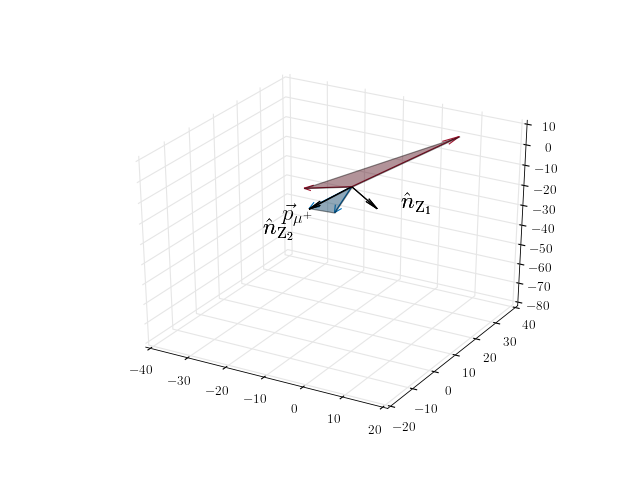

In [103]:
# Create axes
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.autoscale(enable=False)
ax.xaxis.set_pane_color((1,1,1))
ax.yaxis.set_pane_color((1,1,1))
ax.zaxis.set_pane_color((1,1,1))
#ax.xaxis.pane.fill = False

plt.rc('text', usetex=True)

rankDict = {1:r"$\vec{p}_{\ell_1}$", 2:r"", 3:r"", 4:r"", 100:r"$\vec{p}_{\ell_{2,3,4}}$"}
rankDict = {1:r"", 2:r"$\vec{p}_{\mathrm{e}_2}$", 3:r"", 4:r"", 100:r"$\vec{p}_{\mathrm{Z}_2}$"}


# Get a random event
evtNum = 98495 #rng.Integer(nEntries)
t.GetEntry(evtNum)


# Get leptons
trio = t.k_plus + t.k_minus + t.p_minus
kk_pair, pp_pair = t.k_plus + t.k_minus, t.p_plus + t.p_minus
p4   = (t.p_plus,    t.p_minus,   t.k_plus,   t.k_minus)#, kk_pair)#, trio)   # Momentum
q    = (+1,          -1,          +1,         -1, 0)          # Charge
pdg  = (t.p_pdg,     t.p_pdg,     t.k_pdg,    t.k_pdg, t.k_pdg)#,0)     # Flavor
pair = ('p',         'p',         'p',        'p', 'k')
rank = (t.p_plus_i,  t.p_minus_i, t.k_plus_i, t.k_minus_i, 99) # Momentum order

st = (1.1, 1.5, 1.7, 1.7, 1.4)#1.3)

# Draw lines and +/- markers
for _p4, _q, _pdg, _pair, _st, _r in zip(p4, q, pdg, pair, st, rank):
    ax.quiver(0, 0, 0, _p4.Px(), _p4.Py(), _p4.Pz(), pivot='tail', length=_p4.P(), color=colorDict[_pdg], \
              arrow_length_ratio=4/_p4.P(), linestyle=lineDict[_pair])
    ax.text(_st*_p4.Px(), _st*_p4.Py(), _st*_p4.Pz(), flavorDict[_pdg*_q], None, fontsize=21)
    #ax.text(_st*_p4.Px(), _st*_p4.Py(), _st*_p4.Pz(), rankDict[_r+1], None, fontsize=21)

name = "untitled"


    
'''    
# beta
p_2, kk_pair = t.p_minus.Vect(), kk_pair.Vect()
n = p_2.Cross(kk_pair).Unit()
u = 10 * p_2.Unit()

angle, dangle = 0, 0.01
dx, dy, dz = [], [], []
while angle < p_2.Angle(kk_pair):
    dx.append(u.X())
    dy.append(u.Y())
    dz.append(u.Z())
    u.Rotate(dangle, n)
    angle = angle + dangle
    
ax.plot(dx, dy, dz, color="#bf6ecf")
l = 20 * p_2.Unit()
l.Rotate(3*p_2.Angle(kk_pair)/4, n)
ax.text(l.X(), l.Y(), l.Z()+5, r"$\beta$", None, fontsize=21)
name = "beta"
'''



'''
# alpha_p
p_plus, p_minus = t.p_plus.Vect(), t.p_minus.Vect()
n = p_plus.Cross(p_minus).Unit()
u = 10 * p_plus.Unit()

angle, dangle = 0, 0.01
dx, dy, dz = [], [], []
while angle < t.pp_angle:
    dx.append(u.X())
    dy.append(u.Y())
    dz.append(u.Z())
    u.Rotate(dangle, n)
    angle = angle + dangle
    
ax.plot(dx, dy, dz, color=angleDict[t.p_pdg])
l = 12 * p_plus.Unit()
l.Rotate(3*t.pp_angle/4, n)
ax.text(l.X(), l.Y(), l.Z()+5, r"$\alpha_{\mathrm{Z}_1}$", None, fontsize=21)


# alpha_k
k_plus, k_minus = t.k_plus.Vect(), t.k_minus.Vect()
n = k_plus.Cross(k_minus).Unit()
u = 10 * k_plus.Unit()

angle = 0
dx, dy, dz = [], [], []
while angle < t.kk_angle:
    dx.append(u.X())
    dy.append(u.Y())
    dz.append(u.Z())
    u.Rotate(dalpha, n)
    angle = angle + dangle

ax.plot(dx, dy, dz, color=angleDict[t.k_pdg])
l = 30 * k_plus.Unit()
l.Rotate(t.kk_angle/3, n)
ax.text(l.X(), l.Y(), l.Z(), r"$\alpha_{\mathrm{Z}_2}$", None, fontsize=21)

name = "alpha"
'''



'''
# psi
p_plus, p_minus = t.p_plus.Vect(), t.p_minus.Vect()
N_pp = p_plus.Cross(p_minus)

ax.quiver(0, 0, 0, N_pp.X(), N_pp.Y(), N_pp.Z(), pivot='tail', length=N_pp.Mag(), color=colorDict[t.p_pdg], \
            arrow_length_ratio=4/N_pp.Mag(), linestyle='--')
l = 30 * N_pp.Unit()
ax.text(l.X(), l.Y()-30, l.Z(), r"$\vec{p}_{\mathrm{e}^+} \times \vec{p}_{\mathrm{e}^-}$", None, fontsize=21)
    
name = "psi"
'''




# Adjust axis limits
lim=30
ax.set_xlim(left=-lim, right=lim)
ax.set_ylim(bottom=-lim, top=lim)
ax.set_zlim(bottom=-lim, top=lim)
plt.show()

fig.savefig(name + ".png", format='png', transparent=True, bbox_inches='tight')

<IPython.core.display.Javascript object>


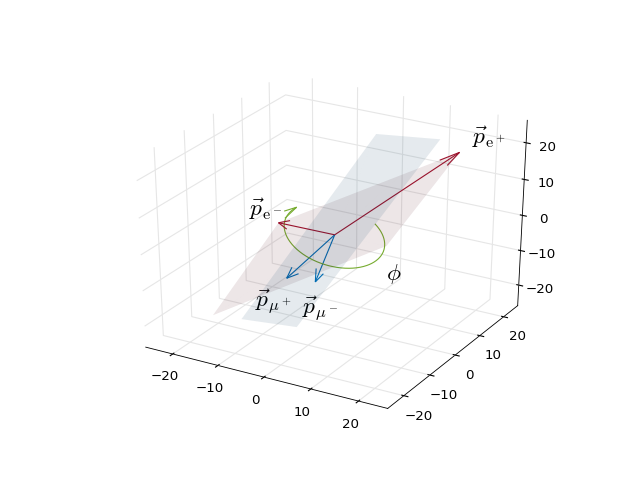

In [10]:
t.GetEntry(98495)
pp_pair, kk_pair = t.p_plus + t.p_minus, t.k_plus + t.k_minus

# phi
pp_pair, kk_pair = 0.25 * pp_pair.Vect(), 0.25 * kk_pair.Vect()
p_plus, p_minus = t.p_plus.Vect(), t.p_minus.Vect()
k_plus, k_minus = t.k_plus.Vect(), t.k_minus.Vect()
n_pp, n_kk = p_plus.Cross(p_minus).Unit(), 25 * k_plus.Cross(k_minus).Unit()


# Create axes
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.autoscale(enable=False)
ax.xaxis.set_pane_color((1,1,1))
ax.yaxis.set_pane_color((1,1,1))
ax.zaxis.set_pane_color((1,1,1))

'''
X, Y, Z = [0, t.p_minus.Px(), t.p_plus.Px()], [0, t.p_minus.Py(), t.p_plus.Py()], [0, t.p_minus.Pz(), t.p_plus.Pz()]
ax.plot_trisurf(X, Y, Z, color=colorDict[t.p_pdg], edgecolor='none', alpha=0.2)
ax.quiver(0, 0, 0, n_pp.X(), n_pp.Y(), n_pp.Z(), pivot='tail', length=n_kk.Mag(), color=colorDict[t.p_pdg], \
            arrow_length_ratio=4/n_kk.Mag())
ax.text(30*n_pp.X(), 30*n_pp.Y()-5, + 35*n_pp.Z(), r"$\vec{n}_{\mathrm{Z}_1}$", None, fontsize=21)


X, Y, Z = [0, t.k_minus.Px(), t.k_plus.Px()], [0, t.k_minus.Py(), t.k_plus.Py()], [0, t.k_minus.Pz(), t.k_plus.Pz()]
ax.plot_trisurf(X, Y, Z, color=colorDict[t.k_pdg], edgecolor='none', alpha=0.2)
ax.quiver(0, 0, 0, n_kk.X(), n_kk.Y(), n_kk.Z(), pivot='tail', length=n_kk.Mag(), color=colorDict[t.k_pdg], \
            arrow_length_ratio=4/n_kk.Mag())
ax.text(1.5 * n_kk.X(), 1.5 * n_kk.Y(), 1.5 * n_kk.Z(), r"$\vec{n}_{\mathrm{Z}_2}$", None, fontsize=21)


u = 15 * n_pp
angle, dangle = 0, 0.01
dx, dy, dz = [], [], []
while angle < t.phi:
    dx.append(u.X())
    dy.append(u.Y())
    dz.append(u.Z())
    u.Rotate(dangle, n_cross)
    angle = angle + dangle
    
ax.plot(dx, dy, dz, color="#77ac30", linewidth=2)
ax.quiver(dx[-10], dy[-10], dz[-10], dx[-1]-dx[-10], dy[-1]-dy[-10], dz[-1]-dz[-10], pivot='tail', length=1, \
          color="#77ac30", arrow_length_ratio=4, linewidth=2)
l = 29 * n_pp.Unit()
l.Rotate(2*t.phi/3, n_cross)
ax.text(l.X(), l.Y()+5, l.Z(), r"$\phi$", None, fontsize=21)

name = "phi"

p4   = (t.p_plus,    t.p_minus,   t.k_plus,   t.k_minus)#, kk_pair)#, trio)   # Momentum
q    = (+1,          -1,          +1,         -1, 0)          # Charge
pdg  = (t.p_pdg,     t.p_pdg,     t.k_pdg,    t.k_pdg, t.k_pdg)#,0)     # Flavor

for _p4, _q, _pdg in zip(p4, q, pdg):
    ax.quiver(0, 0, 0, _p4.Px(), _p4.Py(), _p4.Pz(), pivot='tail', length=_p4.P(), color=colorDict[_pdg], \
              arrow_length_ratio=4/_p4.P(), linestyle='-')
    ''' 
    
    # Get leptons
p4   = (t.p_plus,    t.p_minus,   t.k_plus,   t.k_minus)#, kk_pair)#, trio)   # Momentum
q    = (+1,          -1,          +1,         -1, 0)          # Charge
pdg  = (t.p_pdg,     t.p_pdg,     t.k_pdg,    t.k_pdg, t.k_pdg)#,0)     # Flavor
pair = ('p',         'p',         'p',        'p', 'k')
rank = (t.p_plus_i,  t.p_minus_i, t.k_plus_i, t.k_minus_i, 99) # Momentum order

st = (1.1, 1.5, 1.7, 1.7, 1.4)#1.3)

# Draw lines and +/- markers
for _p4, _q, _pdg, _pair, _st, _r in zip(p4, q, pdg, pair, st, rank):
    ax.quiver(0, 0, 0, _p4.Px(), _p4.Py(), _p4.Pz(), pivot='tail', length=_p4.P(), color=colorDict[_pdg], \
              arrow_length_ratio=4/_p4.P(), linestyle=lineDict[_pair])
    ax.text(_st*_p4.Px(), _st*_p4.Py(), _st*_p4.Pz(), flavorDict[_pdg*_q], None, fontsize=21)
    
    
X = [0, t.p_minus.Px(), t.p_plus.Px(), -t.p_minus.Px(), -t.p_plus.Px()]
Y = [0, t.p_minus.Py(), t.p_plus.Py(), -t.p_minus.Py(), -t.p_plus.Py()]
Z = [0, t.p_minus.Pz(), t.p_plus.Pz(), -t.p_minus.Pz(), -t.p_plus.Pz()]
ax.plot_trisurf(X, Y, Z, color=colorDict[t.p_pdg], edgecolor='none', alpha=0.1)


X = [0, 2*t.k_minus.Px(), 2*t.k_plus.Px(), -2*t.k_minus.Px(), -2*t.k_plus.Px()]
Y = [0, 2*t.k_minus.Py(), 2*t.k_plus.Py(), -2*t.k_minus.Py(), -2*t.k_plus.Py()]
Z = [0, 2*t.k_minus.Pz(), 2*t.k_plus.Pz(), -2*t.k_minus.Pz(), -2*t.k_plus.Pz()]
ax.plot_trisurf(X, Y, Z, color=colorDict[t.k_pdg], edgecolor='none', alpha=0.1)

kk_cross = 10 * n_kk.Cross(kk_pair).Unit()
#ax.plot([kk_cross.X(), -kk_cross.X()], [kk_cross.Y(), -kk_cross.Y()], [kk_cross.Z(), -kk_cross.Z()], \
#        color=colorDict[t.k_pdg], linestyle='--')

pp_cross = 10 * n_pp.Cross(pp_pair).Unit()
#ax.plot([pp_cross.X(), -pp_cross.X()], [pp_cross.Y(), -pp_cross.Y()], [pp_cross.Z(), -pp_cross.Z()], \
#        color=colorDict[t.p_pdg], linestyle='--')
#ax.quiver(-pp_cross.X(), -pp_cross.Y(), -pp_cross.Z(), n_pp.X(), n_pp.Y(), n_pp.Z(), pivot='tail', \
#          length=2*pp_cross.Mag(), color=colorDict[t.p_pdg], arrow_length_ratio=2/pp_cross.Mag(), linestyle='--')
#ax.text(-pp_cross.X()+n_pp.X(), -pp_cross.Y()+n_pp.Y()+25, -pp_cross.Z()+n_pp.Z()-37, \
#        r"$\hat{n}_{\mathrm{Z}_1}$", None, fontsize=21)

u = 10 * -pp_cross.Unit()
angle, dangle = 0, 0.01
dx, dy, dz = [], [], []
while angle < 3.14 + t.phi:
    dx.append(u.X())
    dy.append(u.Y())
    dz.append(u.Z())
    u.Rotate(dangle, kk_pair)
    angle = angle + dangle
ax.plot(dx, dy, dz, color="#77ac30")
ax.quiver(dx[-10], dy[-10], dz[-10], dx[-1]-dx[-10], dy[-1]-dy[-10], dz[-1]-dz[-10], pivot='tail', length=1, \
          color="#77ac30", arrow_length_ratio=4)

#ax.quiver(dx[-1], dy[-1], dz[-1], n_kk.X(), n_kk.Y(), n_kk.Z(), pivot='tail', length=2*pp_cross.Mag(), \
#          color=colorDict[t.k_pdg], arrow_length_ratio=2/pp_cross.Mag(), linestyle='--')
#ax.text(dx[-1]+n_pp.X()-25, dy[-1]+n_pp.Y(), dz[-1]+n_pp.Z()-20, \
#        r"$\hat{n}_{\mathrm{Z}_2}$", None, fontsize=21)


l = 17 * -pp_cross.Unit()
l.Rotate(t.phi*1.5, kk_pair)
ax.text(l.X(), l.Y(), l.Z(), r"$\phi$", None, fontsize=21)


#name = "phi"
name = "phi2"


# Adjust axis limits
lim=25
ax.set_xlim(left=-lim, right=lim)
ax.set_ylim(bottom=-lim, top=lim)
ax.set_zlim(bottom=-lim, top=lim)
plt.show()

fig.savefig(name + ".png", format='png', transparent=True, bbox_inches='tight')

In [31]:
# Weirdo registry
# 9, 72830, 59830, 28293, 84830, 95243, 67438, 82952, 70863, 86589

<IPython.core.display.Javascript object>


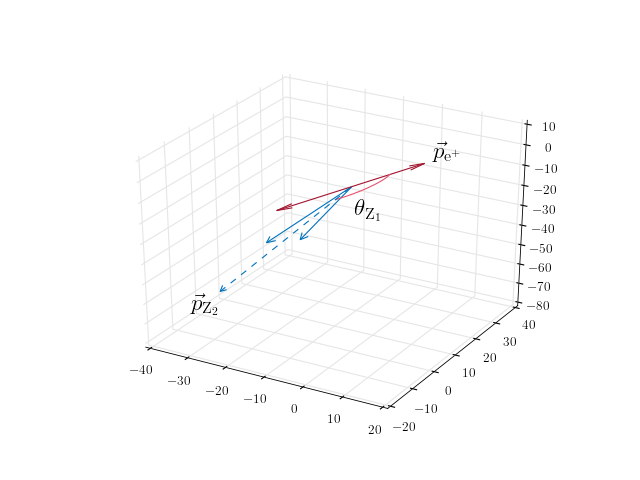

In [164]:
t.GetEntry(98495)
flavorDict = {11:r"$\vec{p}_{\mathrm{e}^+}$", -11:r"", 13:r"", -13:r"", 0:r"$\vec{p}_{\mathrm{Z}_2}$"}

# Boost into pp cm frame
pp_pair = t.p_plus + t.p_minus
pp_boost = pp_pair.BoostVector()

pp_p_plus = t.p_plus
pp_p_plus.Boost(-pp_boost)
pp_p_minus = t.p_minus
pp_p_minus.Boost(-pp_boost)

pp_k_plus = t.k_plus
pp_k_plus.Boost(-pp_boost)
pp_k_minus = t.k_minus
pp_k_minus.Boost(-pp_boost)

pp_kk_pair = pp_k_plus + pp_k_minus


# Create axes
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.autoscale(enable=False)
ax.xaxis.set_pane_color((1,1,1))
ax.yaxis.set_pane_color((1,1,1))
ax.zaxis.set_pane_color((1,1,1))


# Get leptons
p4   = (pp_p_plus,   pp_p_minus,  pp_k_plus,  pp_k_minus, pp_kk_pair)   # Momentum
q    = (+1,          -1,          +1,         -1,         0)          # Charge
pdg  = (t.p_pdg,     t.p_pdg,     t.k_pdg,    t.k_pdg,    t.k_pdg)     # Flavor
pair = ('p',         'p',         'p',        'p',        'k')

st = (1.1, 1.5, 1.7, 1.7, 1.25)

# Draw lines and +/- markers
for _p4, _q, _pdg, _pair, _st in zip(p4, q, pdg, pair, st):
    ax.quiver(0, 0, 0, _p4.Px(), _p4.Py(), _p4.Pz(), pivot='tail', length=_p4.P(), color=colorDict[_pdg], \
              arrow_length_ratio=4/_p4.P(), linestyle=lineDict[_pair])
    ax.text(_st*_p4.Px(), _st*_p4.Py(), _st*_p4.Pz(), flavorDict[_pdg*_q], None, fontsize=21)
    

#'''    
# theta
p_plus, kk_pair = pp_p_plus.Vect(), pp_kk_pair.Vect()
n = p_plus.Cross(kk_pair).Unit()
u = 10 * p_plus.Unit()

angle, dangle = 0, 0.01
dx, dy, dz = [], [], []
while angle < t.p_theta:
    dx.append(u.X())
    dy.append(u.Y())
    dz.append(u.Z())
    u.Rotate(dangle, n)
    angle = angle + dangle
    
ax.plot(dx, dy, dz, color=angleDict[t.p_pdg])
l = 50 * p_plus.Unit()
l.Rotate(3*t.p_theta/4, n)
ax.text(l.X(), l.Y(), l.Z(), r"$\theta_{\mathrm{Z}_1}$", None, fontsize=21)
name = "theta"
#'''
    
    
# Adjust axis limits
ax.set_xlim(left=-40, right=20)
ax.set_ylim(bottom=-20, top=40)
ax.set_zlim(bottom=-80, top=10)
plt.show()

fig.savefig(name + ".png", format='png', transparent=True, bbox_inches='tight')

In [1]:
# Boost into kk cm frame
kk_pair = t.k_plus + t.k_minus
kk_boost = kk_pair.BoostVector()

kk_p_plus = t.p_plus
kk_p_plus.Boost(-kk_boost)
kk_p_minus = t.p_minus
kk_p_minus.Boost(-kk_boost)

kk_k_plus = t.k_plus
kk_k_plus.Boost(-kk_boost)
kk_k_minus = t.k_minus
kk_k_minus.Boost(-kk_boost)

kk_pp_pair = kk_p_plus + kk_p_minus


# Create axes
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.autoscale(enable=False)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False


# Get leptons
p4   = (kk_p_plus,   kk_p_minus,  kk_k_plus,  kk_k_minus, kk_pp_pair)   # Momentum
q    = (+1,          -1,          +1,         -1,         0)          # Charge
pdg  = (t.p_pdg,     t.p_pdg,     t.k_pdg,    t.k_pdg,    t.p_pdg)     # Flavor
pair = ('p',         'p',         'p',        'p',        'k')


# Draw lines and +/- markers
for _p4, _q, _pdg, _pair in zip(p4, q, pdg, pair):
    ax.plot([0, _p4.Px()], [0, _p4.Py()], [0, _p4.Pz()], color=colorDict[_pdg], linestyle=lineDict[_pair])
    ax.scatter(_p4.Px(), _p4.Py(), _p4.Pz(), marker=markerDict[_q], s=200, c='k')
    
    
# Adjust axis limits
lim=5
ax.set_xlim(left=-lim, right=lim)
ax.set_ylim(bottom=-lim, top=lim)
ax.set_zlim(bottom=-lim, top=lim)
plt.show()

NameError: name 't' is not defined

In [ ]:
# Print event info
print("")
print("Event", evtNum)
print("")
print("\t   - LEPTONS -")
print("Vector", "Flavor", "Rank", "Momentum", sep='\t')
for _p4, _q, _pdg, _pair, _rank in zip(p4, q, pdg, pair, rank):
    print(_pair+chargeDict[_q], flavorDict[_pdg], _rank+1, "%5.2f GeV"%_p4.P(), sep='\t')
print("")
print("\t    - PAIRS -")
print("Leptons", " Separation", "Mass", sep='\t')
print("p+p-",    "%5.2f rad"%t.pp_angle, "%5.2f GeV"%t.pp_pair.M(), sep='\t')
print("k+k-",    "%5.2f rad"%t.kk_angle, "%5.2f GeV"%t.kk_pair.M(), sep='\t')
print("")
print("\t - OBSERVABLES -")
print("phi",     "%5.2f rad"%t.phi,      "%5.2f sin"%t.sin_phi,     sep='\t')
print("theta_p", "%5.2f rad"%t.p_theta, sep='\t')
print("theta_k", "%5.2f rad"%t.k_theta, sep='\t')